<a href="https://colab.research.google.com/github/azizeko29/new_deteksi_fraud/blob/master/%5Bnew_ENN%5D_ULB_pemodelan_ensemble_learning_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %matplotlib inline
# from IPython.display import display
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statistics import stdev

from sklearn import tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import collections
import time
from scipy import stats

In [0]:
# np.random.seed(1)

In [0]:
def confussion_matrik(actual,predict):
    TP,FP,FN,TN = 0,0,0,0
    for i,val in enumerate(actual):
        if val == 0:
            if val == predict[i]:
                TN += 1
            else:
                FP += 1
        if val == 1:
            if val == predict[i]:
                TP += 1
            else:
                FN += 1
    return TP,FP,FN,TN
 
def acc_sens_spec(actual,predict):
    TP,FP,FN,TN = confussion_matrik(actual,predict)
# akurasi
    if (TP+FP+FN+TN) == 0 :
        accuracy = 0 
    else :
        accuracy = (TP+TN)/(TP+FP+FN+TN)
        
# sensitivity
    if (TP+FN) == 0 :
        sensitivity = 0
    else :
        sensitivity = TP/(TP+FN)
        
# specifity    
    if (TN +FP) == 0 :
        specifity = 0
    else :
        specifity = TN/(TN +FP)
        
# precision
    if (TP+FP) == 0 :
        precision = 0
    else :
        precision = TP/(TP+FP)

# recall
    recall = sensitivity

# f1_score
    if (precision+recall) == 0 :
        f1_score = 0
    else :
        f1_score = 2*((precision*recall)/(precision+recall))  
    
    return accuracy,sensitivity,specifity,precision,recall,f1_score

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    #how many correct predictions?
    correct = 0
    #for each actual label
    for i in range(len(actual)):
        #if actual matches predicted label
        if actual[i] == predicted[i]:
            #add 1 to the correct iterator
            correct += 1
    #return percentage of predictions that were correct
    return correct / float(len(actual)) * 100.0

In [0]:
# confussion_matrik(y,pred)

In [0]:
# accuracy,sensitivity,specifity = acc_sens_spec(y,pred)
# print('acc',accuracy)
# print('sens',sensitivity)
# print('spec',specifity)

In [0]:
# accuracy_metric(y,RF.predict(X))

In [0]:
def cross_val_split(X,fold=2,seed=0):
    np.random.seed(seed)
    n_folds= fold
    size = X.shape[0]/n_folds
    X_idx = list(range(X.shape[0]))
    folds_data= []
    for i in range(n_folds):
#         print(X_idx)
        random_idx = list(np.random.choice(X_idx,int(size),replace=False))
#         print(random_idx)
        X_idx = [idx for idx in X_idx if idx not in random_idx]
#         print(X_idx)

        folds_data.append(random_idx)
#         print("--")
    return folds_data

def kfold_cross_validation(model,X,y, n_fold=2, n_seed=0):
    folds = cross_val_split(X,fold=n_fold,seed=n_seed)
    fold_result =[]
    for i in range(len(folds)):
    #     print(i)
        train = []
        for j in range(len(folds)):
            if j != i:
                train = train + folds[j]
        test = folds[i]

        X_train = X.iloc[train,:].reset_index(drop=True)
        y_train = y[train].reset_index(drop=True)

        X_test = X.iloc[test,:].reset_index(drop=True)
        y_test = y[test].reset_index(drop=True)


        t0 = time.time()
        model.fit(X_train, y_train)
        t1 = time.time()
        waktu = t1 - t0

        predict = model.predict(X_test)
        accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

        result = [accuracy,sensitivity,specifity,precision,recall,f1_score,waktu]
        fold_result.append(result)
        
    return fold_result

In [0]:
def testing(model,X_test,y_test):
    result_ = []

#       t0 = time.time()
#       model.fit(X_train, y_train)
#       t1 = time.time()
#       waktu = t1 - t0
    predict = model.predict(X_test)
    accuracy,sensitivity,specifity,precision,recall,f1_score = acc_sens_spec(y_test,predict)

    result = [accuracy,sensitivity,specifity,precision,recall,f1_score]
        
    result_.append(result)
        
    return result_

In [0]:
# from sklearn.decomposition import PCA
# import pylab as pl
# def plot_this(X_rs,y_rs,method):
#   # Use principal component to condense the 10 features to 2 features
#   pca = PCA(n_components=2).fit(X_rs)
#   pca_2d = pca.transform(X_rs)
#   # Assign colors
#   for i in range(0, pca_2d.shape[0]):
#     if y_rs[i] == 0:
#       c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
#     elif y_rs[i] == 1:
#       c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
#   pl.legend([c1, c2], ['Class 1', 'Class 2'])
#   pl.title(method)
#   pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
#   pl.show()
    


## ---------

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# ##read data

df_train = pd.read_csv('data/ULB_preprocessing_train.csv',sep=";")

# read_df.head()

In [0]:
# ##read data

df_test = pd.read_csv('data/ULB_preprocessing_test.csv',sep=";")

# read_df.head()

## --

In [0]:
df_train['Class'].value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [0]:
X = df_train.drop('Class', axis=1)
y = df_train['Class'].copy()

In [0]:
ratio_class = dict(df_train['Class'].value_counts())
ratio_class

{0: 199020, 1: 344}

In [0]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours # doctest: +NORMALIZE_WHITESPACE

# RandomUnderSampler
sampler = EditedNearestNeighbours(random_state=1)
# sampler = EditedNearestNeighbours(ratio=ratio_class)

X_sample, y_sample = sampler.fit_sample(X, y)
# print('Random undersampling {}'.format(Counter(y_rs))

In [0]:
# X_sample, y_sample = sampler.fit_sample(X, y)
# print('Random undersampling {}'.format(Counter(y_rs))

In [0]:
df_new = pd.DataFrame(X_sample,columns=df_train.columns[:-1])
df_new['Class'] = y_sample

In [0]:
# count = 0
# for a in df_new.columns:
#     if df_new[a].isnull().sum() > 0 :
#         print(a)
#         count+=1
# count

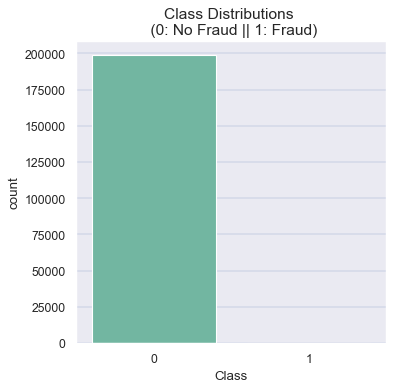

In [0]:
plt.figure(1,figsize=(5, 5), dpi=80)
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
sns.countplot('Class', data=df_new,palette='Set2')

In [0]:
X_new = df_new.drop('Class', axis=1)
y_new = df_new['Class'].copy()

In [0]:
y_new.value_counts()

0    198695
1       344
Name: Class, dtype: int64

In [0]:
X_new.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [0]:
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class'].copy()

In [0]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

# # k-folds


In [0]:
def validasi_model (clf,X,y,kfolds):
    CV_SKLearn = kfold_cross_validation(clf,X,y,n_fold=kfolds,n_seed=1)
    df_result = pd.DataFrame(data= CV_SKLearn, columns=['Akurasi','Sensitivity','Specifity','precision','recall','f1_score','Waktu'])

    df_result.insert(loc=0, column='No', value=list(range(1,df_result.shape[0]+1)))
    df_result = df_result.set_index('No')

    del df_result.index.name

    df_result = df_result.append(df_result.describe()[1:2])
    
    return df_result
# result_SKLearn = result_SKLearn.append('')

In [0]:
# Classifier Libraries
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

    
clf_RF = RandomForestClassifier(random_state=1)
clf_AB = AdaBoostClassifier(random_state=1,n_estimators=100)
clf_B = BaggingClassifier(random_state=1,n_estimators=100)
clf_ET = ExtraTreesClassifier(random_state=1,n_estimators=100)
clf_GB = GradientBoostingClassifier(random_state=1)

##skenario 
skenario_1 = {}
skenario_1['1'] = clf_RF
# skenario_1['2'] = clf_AB
# skenario_1['3'] = clf_B
# skenario_1['4'] = clf_ET
skenario_1['5'] = clf_GB


-------

## Tuning

In [0]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = RandomForestClassifier(random_state=1,n_jobs=-1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
               "max_features": ['sqrt','log2',None],
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {
#                 "max_depth": [5,9,11,15 ],
              'n_estimators' : [10,25,50,75,100],
               "max_features": ['sqrt','log2',None],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
# start = time()
# grid_search.fit(X_new, y_new)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.cv_results_['params'])))
# report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 5213.12 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'n_estimators': 75, 'max_features': 'sqrt'}

Model with rank: 2
Mean validation score: 1.000 (std: 0.000)
Parameters: {'n_estimators': 100, 'max_features': 'sqrt'}

Model with rank: 3
Mean validation score: 1.000 (std: 0.000)
Parameters: {'n_estimators': 50, 'max_features': 'sqrt'}



In [0]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# get some data
digits = load_digits()
X, y = digits.data, digits.target

# build a classifier
clf = GradientBoostingClassifier(random_state=1)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": sp_randint(1, 11),
#               "min_samples_split": sp_randint(2, 11),
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False,random_state=1)

start = time()
random_search.fit(X_new, y_new)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3,5,9],
              'n_estimators' : [10,25,50,75,100],
#               "max_features": [1, 3, 10],
#               "min_samples_split": [2, 3, 10],
#               "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"]
             }

# run grid search
# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, iid=False)
# start = time()
# grid_search.fit(X_new, y_new)

# print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
#       % (time() - start, len(grid_search.cv_results_['params'])))
# report(grid_search.cv_results_)

Automatically created module for IPython interactive environment


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV took 5135.21 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.999 (std: 0.000)
Parameters: {'n_estimators': 10, 'max_depth': 5}

Model with rank: 2
Mean validation score: 0.999 (std: 0.000)
Parameters: {'n_estimators': 25, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.999 (std: 0.000)
Parameters: {'n_estimators': 50, 'max_depth': 5}

